#### In this notebook we convert user embeddings (100D vectors) to 2D with TSNE algorithm. Then, we plot them in colors showing their groups (Economy, Politics, etc. )

In [2]:
# twcollector1: Economy and Finance
# twcollector2: Crypto 
# twcollector3: Technology
# twcollector4: Fashion and lifestyle
# twcollector5: Politics
colors = {'1':'cyan', '1_1':'darkcyan', 
          '2':'black', '2_2':'black',
          '3':'magenta', '3_3':'darkmagenta',
          '4':'springgreen', '4_4':'darkgreen',
          '5':'orange', '5_5':'gold'}

In [4]:
#Import all  dependencies
import os
here = os.getcwd()
import json

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE


def readJson(path):
    with open(path, 'r') as outfile:
        data = json.load(outfile)
    outfile.close()
    return data

In [7]:
# coding: utf-8
path_category_vecs = os.path.join(here,"embeddings","categories_train.json") #embeddings of categories
path_user_vecs = os.path.join(here,"embeddings","users_test.json") #embeddings of test users

category_vecs = readJson(path_category_vecs)
user_vecs = readJson(path_user_vecs)

In [8]:
#names of the users to be plotted
plt_list = ['Ralph_Acampora', 'jennablan', 'LanceRoberts', 'asentance',
           'coinbase', 'BitcoinBirch', 'CryptoCred' ,'TheBlueMatt',
           'elonmusk', 'karpathy', 'timoreilly', 'KevinCTofel',
           'KimKardashian', 'McQueen', 'NYTFashion','khloekardashian',
           'SadiqKhan', 'DonaldJTrumpJr', 'mike_pence', 'BorisJohnson']

In [9]:
arr_x = [] #embedding vector
arr_y = [] #label
arr_c = [] #color

for unm in user_vecs.keys():
    _c = user_vecs[unm]["category"][-1]
    arr_c.append(colors[_c])
    arr_y.append(unm)
    arr_x.append(user_vecs[unm]["avr_vec"])

for ctg in category_vecs.keys():
    #print(ctg_vecs[ctg]['avg'])
    _c = ctg[-1]
    arr_c.append(colors[_c + "_" + _c])
    arr_y.append(ctg)
    arr_x.append(category_vecs[ctg]["avr_cat_vec"])

arr_s = [30 for n in range(len(arr_y))]
for i in range(1,6):
    arr_s[-1*i] = arr_s[-1*i]*5

In [13]:
#convert 100D vecs to 2D (xs,ys) points
model = TSNE(learning_rate = 200, n_components=2)
transformed = model.fit_transform(arr_x)

xs = transformed[:,0]
ys = transformed[:,1]

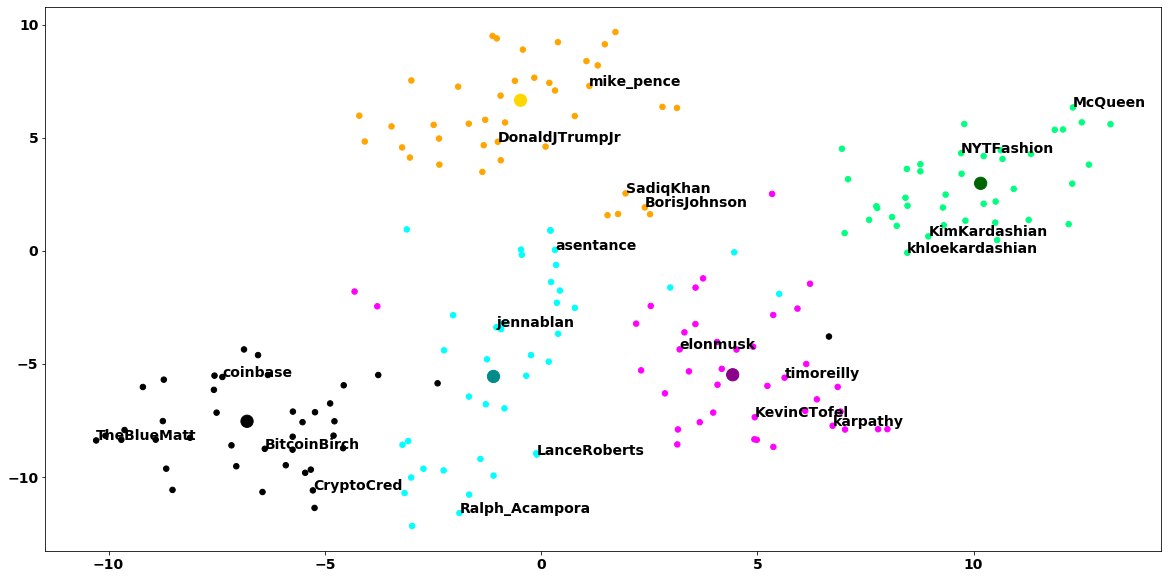

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(xs, ys, c=arr_c, s=arr_s)

plt.rcParams['font.size'] = 14
plt.rcParams["font.weight"] = "bold"

for label, x, y in zip(arr_y, xs, ys):
    if label in plt_list:
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')